In [1]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\Apriori\Order1.csv')

df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:

print(df.columns)
print(df.dtypes)

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')
Member_number       int64
Date               object
itemDescription    object
dtype: object


In [5]:
# Check for missing values and handle them
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [6]:
# Step 2: Generate the List of Transactions
# -----------------------------------------
# Group the dataset by 'Member_number' (each customer's orders)
# For each customer, we will collect all the items they bought into a list
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Display the first few transactions to check
print("\nFirst few transactions:")
print(transactions[:5])


First few transactions:
[['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack'], ['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns'], ['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables'], ['sausage', 'root vegetables', 'rolls/buns', 'detergent', 'frozen meals', 'rolls/buns', 'dental care', 'rolls/buns'], ['other vegetables', 'pip fruit', 'root vegetables', 'canned beer', 'rolls/buns', 'whole milk', 'other vegetables', 'hygiene articles', 'whole milk', 'whole milk', 'frozen fish', 'red/blush wine', 'chocolate', 'shopping bags', 'dish cleaner', 'packaged fruit/vegetables', 'tropical fruit', 'rolls/buns', 'cling film/bags', 'chocolate', 'pastry']]


In [7]:
# Step 3: Prepare the Transaction Data for Apriori
# -----------------------------------------------
# Use TransactionEncoder to convert the transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the result into a DataFrame
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the one-hot encoded transaction data
print("\nOne-Hot Encoded Transaction DataFrame:")
print(transaction_df.head())



One-Hot Encoded Transaction DataFrame:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False   True    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream

In [9]:
# Step 4: Apply the Apriori Algorithm
# -----------------------------------
# Apply the Apriori algorithm to find frequent itemsets
# Choose a minimum support threshold (e.g., min_support=0.005 for 0.5% frequency)
frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True)

# Display the frequent itemsets found by the Apriori algorithm
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.005644                                 (abrasive cleaner)
3     0.007440                                 (artif. sweetener)
4     0.031042                                    (baking powder)
...        ...                                                ...
9871  0.005644  (yogurt, whole milk, whipped/sour cream, rolls...
9872  0.005900  (yogurt, whole milk, sausage, root vegetables,...
9873  0.006157  (yogurt, whole milk, root vegetables, shopping...
9874  0.005131  (yogurt, whole milk, sausage, soda, tropical f...
9875  0.005387  (yogurt, whole milk, sausage, other vegetables...

[9876 rows x 2 columns]


In [11]:
# Step 5: Generate Association Rules
# -----------------------------------
# If frequent itemsets are found, generate association rules
if not frequent_itemsets.empty:
    # Set a minimum confidence threshold for rule generation (e.g., min_confidence=0.3 for 30%)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3,num_itemsets=10)
    
    # Display the generated rules with relevant metrics
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No frequent itemsets found. Try reducing min_support to obtain more itemsets.")



Association Rules:
                                             antecedents  \
0                                (Instant food products)   
1                                (Instant food products)   
2                                (Instant food products)   
3                                (Instant food products)   
4                                             (UHT-milk)   
...                                                  ...   
13582  (whole milk, sausage, other vegetables, rolls/...   
13583                (sausage, yogurt, whole milk, soda)   
13584          (sausage, other vegetables, yogurt, soda)   
13585                (sausage, yogurt, rolls/buns, soda)   
13586      (sausage, other vegetables, rolls/buns, soda)   

                          consequents   support  confidence      lift  
0                        (rolls/buns)  0.005387    0.350000  1.000954  
1                   (root vegetables)  0.006927    0.450000  1.951168  
2                              (soda)  0.00

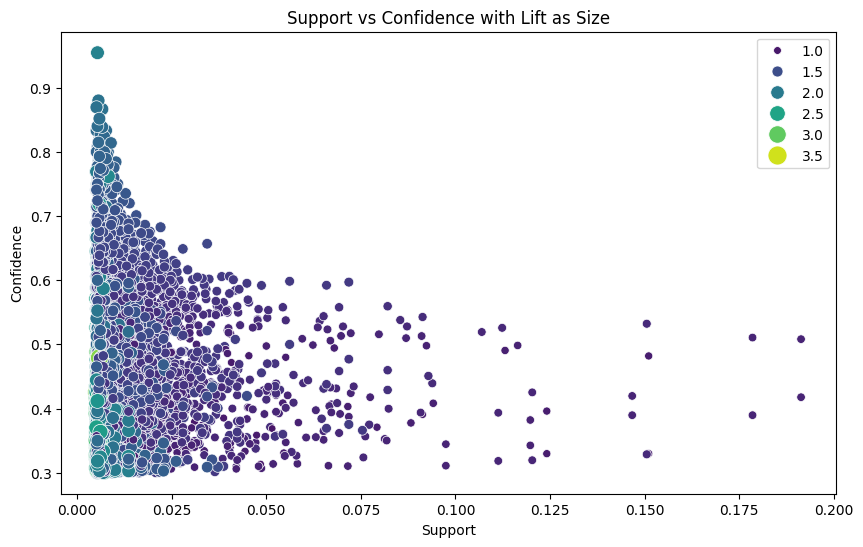

In [12]:
# Step 6: Visualize the Association Rules
# ---------------------------------------
# Check if rules DataFrame is not empty before visualizing
if not frequent_itemsets.empty:
    # Scatter plot to visualize Support vs Confidence with Lift as color and size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))
    plt.title('Support vs Confidence with Lift as Size')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.legend(loc='best')
    plt.show()
else:
    print("No rules to visualize.")